In [15]:
%matplotlib inline
from rama import read
cube = read('betalyr-vizier.vot.xml')

In [21]:
from rama.models.cube import NDPoint
point = cube.find_instances(NDPoint)[0]

In [22]:
point.independent, point.dependent

(['position', 'h_time', 'j_time', 'k_time', 'l_time', 'm_time'],
 ['h_mag', 'j_mag', 'k_mag', 'l_mag', 'm_mag'])

In [23]:
point['position'].measurement.coord

<SkyCoord (ICRS): (ra, dec) in deg
    ( 282.5199802,  33.36266944)>

In [24]:
from rama.adapters.cube import CubePoint, SkyPositionAxis
from matplotlib import pyplot as plt
from astropy import units as u


MOLLWEIDE_TICKS = ['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h']


def plot(instance, x_name=None, y_name=None):
    if isinstance(instance, SkyPositionAxis):
        ra = instance.measurement.coord.ra.wrap_at(180*u.degree)
        dec = instance.measurement.coord.dec
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="mollweide")
        ax.set_xticklabels(MOLLWEIDE_TICKS)
        ax.grid(True)
        ax.scatter(ra.radian, dec.radian)
        return
    if isinstance(instance, CubePoint):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.grid(True)
        ax.scatter(instance[x_name].measurement.coord, instance[y_name].measurement.coord)
        return
    raise Exception()

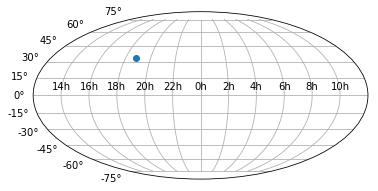

In [25]:
plot(point['position'])

In [26]:
point['h_time'].measurement.coord, point['h_mag'].measurement.coord.cval

(<Time object: scale='tt' format='jd' value=[ 2453486.5   2453311.25  2453307.25  2453283.25  2453226.25  2453225.25
   2453224.5   2453223.25  2453222.25  2453219.5   2453218.25  2453217.5
   2453216.5   2453215.5   2453214.25  2453194.5   2453193.5   2452892.25
   2452891.25  2452869.25  2452867.25  2452866.25  2452843.25  2452842.5
   2452841.5   2452840.5   2452839.5   2452836.5   2452834.25  2452832.5
   2452809.25  2452804.5   2452782.5 ]>,
 <Quantity [ 3.44099998, 3.36999989, 3.28800011, 3.12800002, 3.29299998,
             3.22399998, 3.17799997, 3.35299993, 3.82200003, 3.20700002,
             3.171     , 3.23600006, 3.3829999 , 3.64700007, 3.39400005,
             3.33299994, 3.15199995, 3.59899998, 3.51900005, 3.1099999 ,
             3.29399991, 3.59699988, 3.1170001 , 3.14400005, 3.27600002,
             3.62199998, 3.45600009, 3.16799998, 3.60500002, 3.39299989,
             3.30800009, 3.14499998, 3.5769999 ] mag>)

In [11]:
point['position']

In [28]:
from rama.models.test.sample import Source
from rama.models.test import filter
source = read('hsc-uc1.xml').find_instances(Source)

In [30]:
source = source[0]

In [31]:
source

In [ ]:
source.where(Source.luminosity.filter.name.equal('A_F435W').and(Source.luminosity.filter.value=))

In [44]:
source.luminosity[0].value.unit = "mag"

AttributeError: can't set attribute

In [43]:
source.luminosity[0].value < source.luminosity[1].value

UnitConversionError: Can only apply 'less' function to quantities with compatible dimensions